Let's apply our kernel function to force the data to be linearly separable. For the purposes of demonstration, we'll only pick three features to plot in 3D.

In [2]:
import pandas

data = pandas.read_csv("../data/owls.csv")

Let's plot our features Body Length, Wing Length and Wing Width.

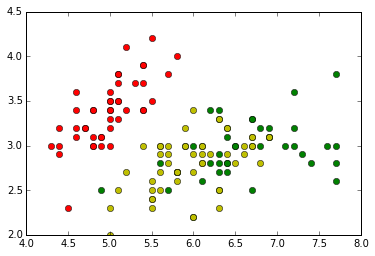

In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca()

for color, label in zip(list("gyr"), ["SnowyOwl", "BarnOwl", "LongEaredOwl"]):
    sl = data["species"] == label
    bl = data[sl]["body-length"].values
    wl = data[sl]["wing-length"].values
    
    ax.plot(wl, bl,  color + 'o')


Now we apply our linear kernel to each datapoint and plot the result. Since we need to separate one class from the rest, we'll select the red (SnowyOwl).

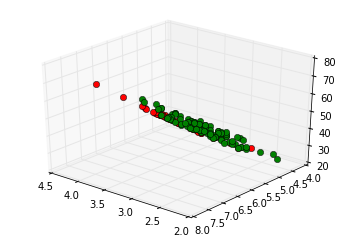

In [27]:
from IPython.html.widgets import interact
from sklearn.metrics.pairwise import linear_kernel
import numpy as np

def linear(x, y):
    return np.inner(x, y)

def disp(angle=180):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    for color, sl in zip(list("rg"), [data["species"] == "SnowyOwl", data["species"] != "SnowyOwl"]):
        bl = data[sl]["body-length"].values
        wl = data[sl]["wing-length"].values
        bl2 = (bl ** 2) + (wl ** 2)

        ax.plot(bl, wl, bl2, color + 'o')
    
    ax.view_init(azim=angle)
    fig.show()
    
out = interact(disp, angle=(0, 180, 10))